# Assessment 1

In [1]:
# preliminaries
%matplotlib widget
import numpy as np
import scipy as sp
import pandas as pd
import scipy.optimize
import scipy.misc
import scipy.stats
import pysces
from matplotlib import pyplot as plt
import os
import copy
from lmfit import Model
backupdir = os.getcwd()


Matplotlib backend set to: "module://ipympl.backend_nbagg"
Matplotlib interface loaded (pysces.plt.m)
Continuation routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.26.4) with SciPy (1.12.0)
Assimulo CVode available


Could not find GLIMDA.


RateChar is available
Parallel scanner is available

PySCeS environment
******************
pysces.model_dir = C:\Users\theow\Pysces\psc
pysces.output_dir = C:\Users\theow\Pysces


***********************************************************************
* Welcome to PySCeS (1.2.0) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2024  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch University, ZA and VU University Amsterdam, NL         *
* PySCeS is distributed under the PySCeS (BSD style) licence, see     *
* LICENCE.txt (supplied with this release) for details                *
* Please cite PySCeS with: doi:10.1093/bioinformatics/bti046          *
***********************************************************************


### 1

In [5]:
A0_5 = pd.read_csv('A0.5B24.csv', sep=',', names=['Time', 'NADPH'])
A1 = pd.read_csv('A1B24.csv', sep=',', names=['Time', 'NADPH'])
A2 = pd.read_csv('A2B24.csv', sep=',', names=['Time', 'NADPH'])
A4 = pd.read_csv('A4B24.csv', sep=',', names=['Time', 'NADPH'])
A8 = pd.read_csv('A8B24.csv', sep=',', names=['Time', 'NADPH'])
A0 = pd.read_csv('A0B0.csv', sep=',', names=['Time', 'NADPH'])

Text(0.5, 1.0, 'Graphical illustration of the change in NADPH concentration over time, apon fluctuations in G6P, when NADP is constant')

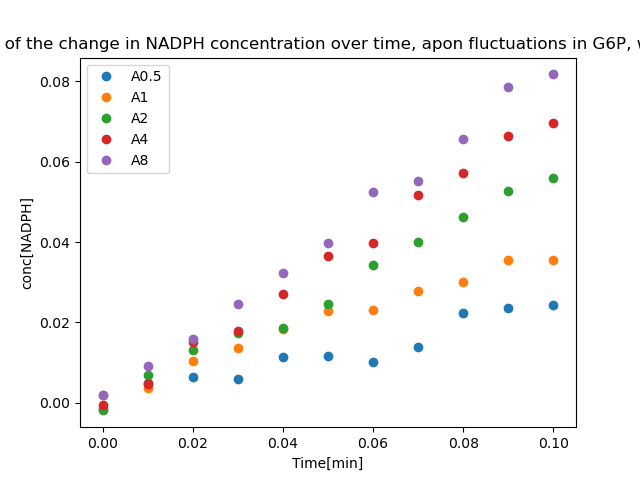

In [6]:
fig, ax = plt.subplots()
ax.plot(A0_5.Time, A0_5.NADPH, 'o', label='A0.5')
ax.plot(A1.Time, A1.NADPH, 'o', label='A1')
ax.plot(A2.Time, A2.NADPH,'o', label='A2')
ax.plot(A4.Time, A4.NADPH, 'o', label='A4')
ax.plot(A8.Time, A8.NADPH, 'o', label='A8')
ax.set_xlabel('Time[min]')
ax.set_ylabel('conc[NADPH]')
ax.legend(loc='best')
plt.title('Graphical illustration of the change in NADPH concentration over time, apon fluctuations in G6P, when NADP is constant')

In [7]:
plt.close('all')

In [8]:
B1_5 = pd.read_csv('A8B1.5.csv', sep=',', names=['Time', 'NADPH'])
B3 = pd.read_csv('A8B3.csv', sep=',', names=['Time', 'NADPH'])
B6 = pd.read_csv('A8B6.csv', sep=',', names=['Time', 'NADPH'])
B12 = pd.read_csv('A8B12.csv', sep=',', names=['Time', 'NADPH'])
B24 = pd.read_csv('A8B24.csv', sep=',', names=['Time', 'NADPH'])


Text(0.5, 1.0, 'Graphical illustration of the change in NADPH concentration over time, apon fluctuations in NADP, when G6P is constant')

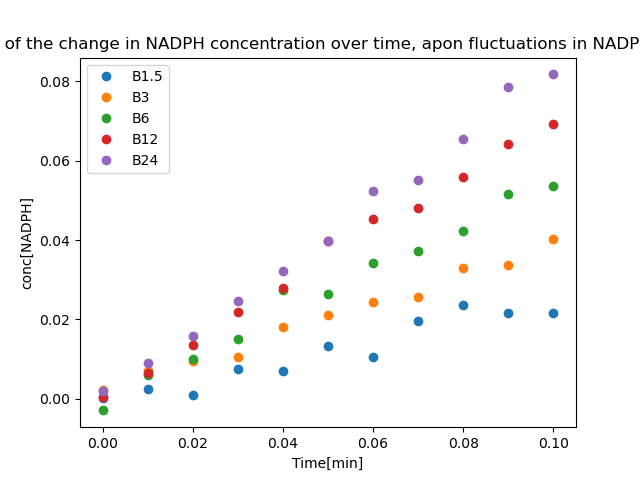

In [9]:
fig, ax = plt.subplots()
ax.plot(B1_5.Time, B1_5.NADPH, 'o', label='B1.5')
ax.plot(B3.Time, B3.NADPH, 'o', label='B3')
ax.plot(B6.Time, B6.NADPH,'o', label='B6')
ax.plot(B12.Time, B12.NADPH, 'o', label='B12')
ax.plot(B24.Time, B24.NADPH, 'o', label='B24')
ax.set_xlabel('Time[min]')
ax.set_ylabel('conc[NADPH]')
ax.legend(loc='best')
plt.title('Graphical illustration of the change in NADPH concentration over time, apon fluctuations in NADP, when G6P is constant')

In [10]:
plt.close('all')

### 2

In [11]:
regA0B0 = sp.stats.linregress(A0)
regA0_5B24 = sp.stats.linregress(A0_5)
regA1B24 = sp.stats.linregress(A1)
regA2B24 = sp.stats.linregress(A2)
regA4B24 = sp.stats.linregress(A4)
regA8B24 = sp.stats.linregress(A8)
regA8B1_5 = sp.stats.linregress(B1_5)
regA8B3 = sp.stats.linregress(B3)
regA8B6 = sp.stats.linregress(B6)
regA8B12 = sp.stats.linregress(B12)

In [12]:
regressions = [regA0B0, regA0_5B24, regA1B24, regA2B24, regA4B24, regA8B24, regA8B1_5, regA8B3, regA8B6, regA8B12]
rates = []
for reg in regressions:
    print (reg.slope)
    rates.append(reg.slope)
rates = np.array(rates)

0.004954646341627726
0.24118661159479945
0.3526304449083254
0.5746500696105541
0.7322856639928835
0.8250788434733143
0.25422083243133853
0.3679535702854621
0.556408829374724
0.7012039804663761


## 3

In [13]:
A = np.array([0, 0.5, 1, 2, 4, 8, 8, 8, 8, 8])
B = np.array([0, 24, 24, 24, 24, 24, 1.5, 3, 6, 12])


In [14]:
ABv = pd.DataFrame({'a': A, 'b': B, 'rate': rates})

In [15]:
ABv 

a     b      rate
0  0.0   0.0  0.004955
1  0.5  24.0  0.241187
2  1.0  24.0  0.352630
3  2.0  24.0  0.574650
4  4.0  24.0  0.732286
5  8.0  24.0  0.825079
6  8.0   1.5  0.254221
7  8.0   3.0  0.367954
8  8.0   6.0  0.556409
9  8.0  12.0  0.701204

### 4

In [16]:
def v(Vf, a, b, Ka, Kb):
    return ((Vf*(a)*(b))/((Ka + a)*(Kb + b)))

In [17]:
from lmfit import Model
mymod = Model(v, independent_vars=['a', 'b'])
mypar  = mymod.make_params(Vf=1, Ka=1, Kb=1)


In [18]:
myfit = mymod.fit(ABv.rate, mypar, a=ABv.a, b=ABv.b)

In [19]:
myfit

### 5

In [20]:
MaxB=ABv[ABv.b==24]

In [21]:
MaxB

a     b      rate
1  0.5  24.0  0.241187
2  1.0  24.0  0.352630
3  2.0  24.0  0.574650
4  4.0  24.0  0.732286
5  8.0  24.0  0.825079

In [22]:
MaxA=ABv[ABv.a==8]

In [23]:
MaxA

a     b      rate
5  8.0  24.0  0.825079
6  8.0   1.5  0.254221
7  8.0   3.0  0.367954
8  8.0   6.0  0.556409
9  8.0  12.0  0.701204

Text(0.5, 1.0, 'Graphical illustration of reaction rate vs G6P concentration, when NADP is kept constant')

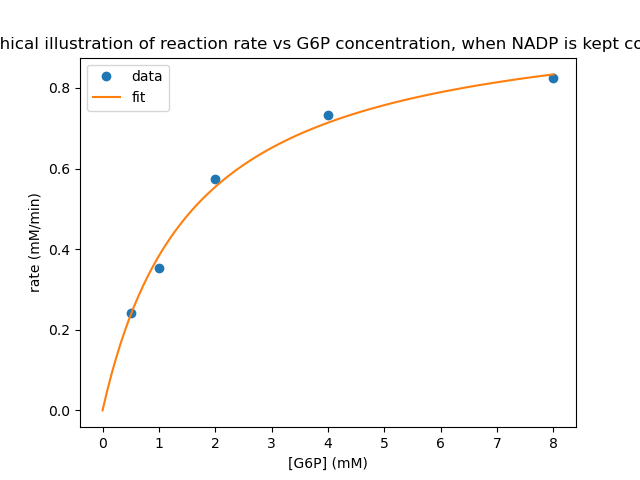

In [26]:
avals = np.linspace(0,8,101)
fig, ax = plt.subplots()
ax.plot(MaxB.a, MaxB.rate, 'o', label='data')
ax.plot(avals, myfit.eval(a=avals, b=24), label='fit')
ax.set_xlabel('[G6P] (mM)')
ax.set_ylabel('rate (mM/min)')
ax.legend(loc='best')
plt.title('Graphical illustration of reaction rate vs G6P concentration, when NADP is kept constant')

Text(0.5, 1.0, 'Graphical illustration of reaction rate vs NADP concentration, when G6P is kept constant')

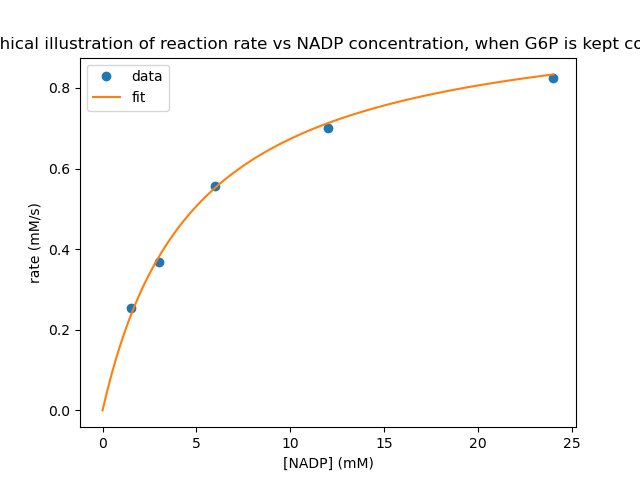

In [25]:
bvals = np.linspace(0,24,101)
fig, ax = plt.subplots()
ax.plot(MaxA.b, MaxA.rate, 'o', label='data')
ax.plot(bvals, myfit.eval(b=bvals, a=8), label='fit')
ax.set_xlabel('[NADP] (mM)')
ax.set_ylabel('rate (mM/s)')
ax.legend(loc='best')
plt.title('Graphical illustration of reaction rate vs NADP concentration, when G6P is kept constant')